# dataloading

In [ ]:
import pandas as pd

file_path = '/Users/Kermi/Desktop/ap mollar/dataset.csv'
data = pd.read_csv(file_path)

data.head()


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


## data inspection

In [ ]:
#shape and data types of the dataset
print(data.shape)
print(data.dtypes)

# summary of statistics
print(data.describe())

# missing values
print(data.isnull().sum())


(550176, 8)
ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object
       Sourcing Cost
count  550176.000000
mean      108.817286
std       104.390093
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.150000
max     32632.500000
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


# random forest

## one hot encoding (for random forest)

converting 'Month of Sourcing' i into a datetime format

In [ ]:
test_data= pd.read_csv('/Users/Kermi/Desktop/ap mollar/test_data.csv')

In [ ]:
# Concatenate training and test data
combined_data = pd.concat([data, test_data])

# Convert 'Month of Sourcing' to datetime if not already converted
combined_data['Month of Sourcing'] = pd.to_datetime(combined_data['Month of Sourcing'], format='%b-%y')

# Apply one-hot encoding to the combined data
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']
combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_columns)

# Split the combined data back into training and test data
final_train = combined_data_encoded[combined_data_encoded['Month of Sourcing'] < '2021-06-01']
final_test = combined_data_encoded[combined_data_encoded['Month of Sourcing'] == '2021-06-01']

# Drop the 'Month of Sourcing' column as it's no longer needed for modeling
X_train = final_train.drop(['Sourcing Cost', 'Month of Sourcing'], axis=1)
y_train = final_train['Sourcing Cost']
X_test = final_test.drop(['Sourcing Cost', 'Month of Sourcing'], axis=1)
y_test = final_test['Sourcing Cost']


## model application

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the newly encoded training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict the Sourcing Cost on the test set
y_pred = rf_model.predict(X_test)

# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error on Test Set: {rmse}')


Root Mean Squared Error on Test Set: 38.51672622216033


In [ ]:
# Extract one tree from the forest
tree = rf_model.estimators_[0]


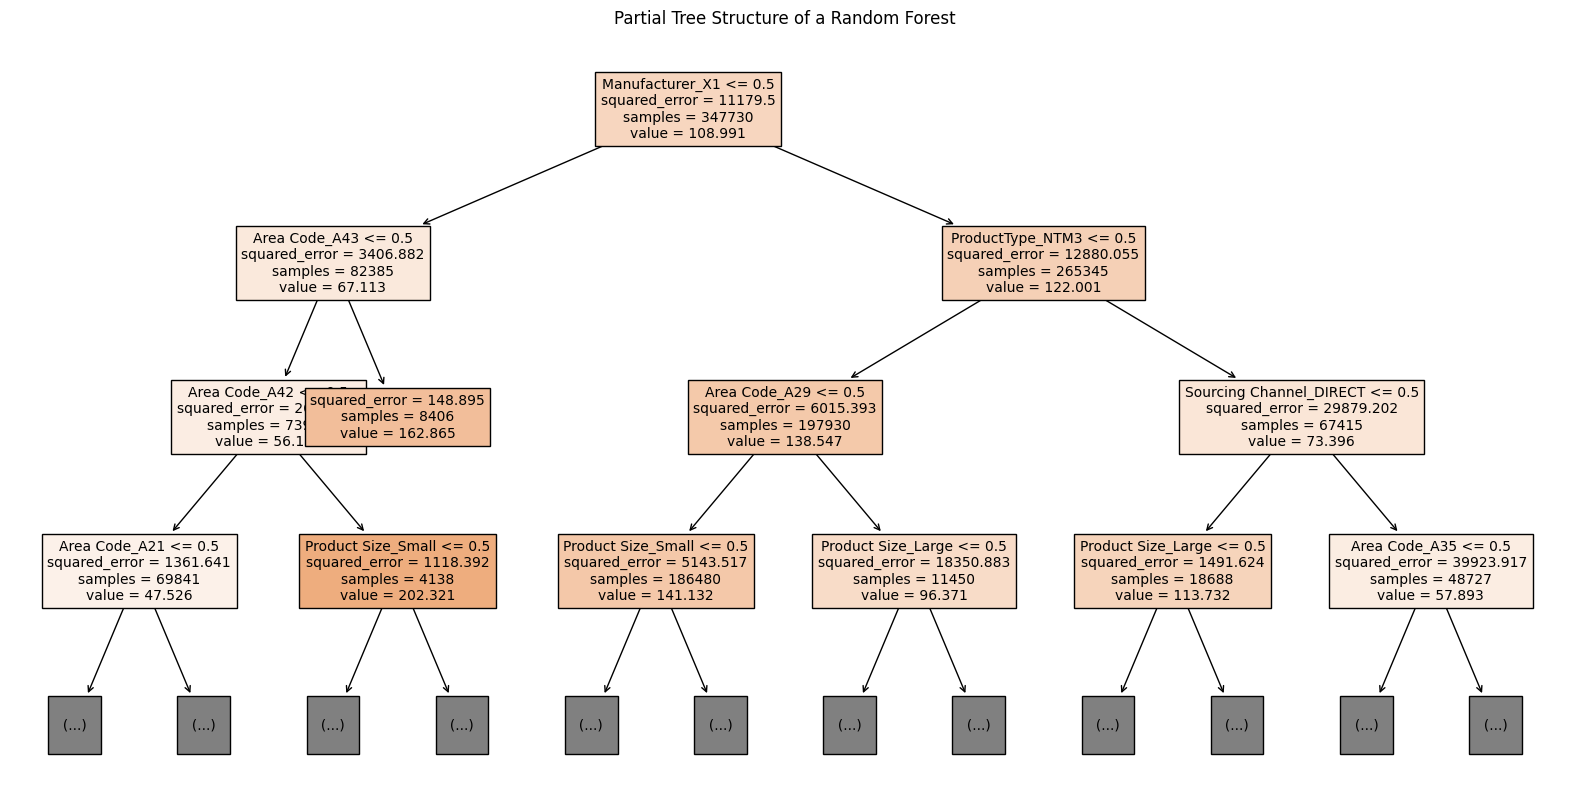

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, max_depth=3, fontsize=10)
plt.title("Partial Tree Structure of a Random Forest")
plt.show()


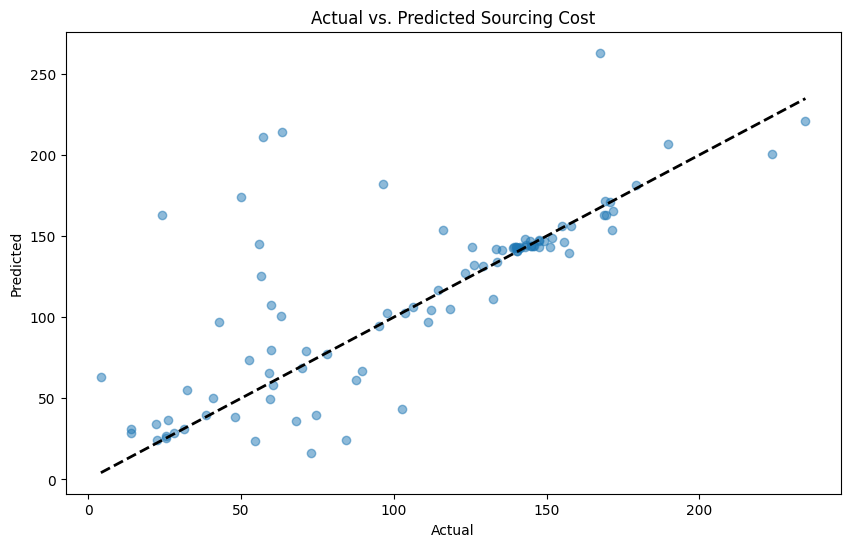

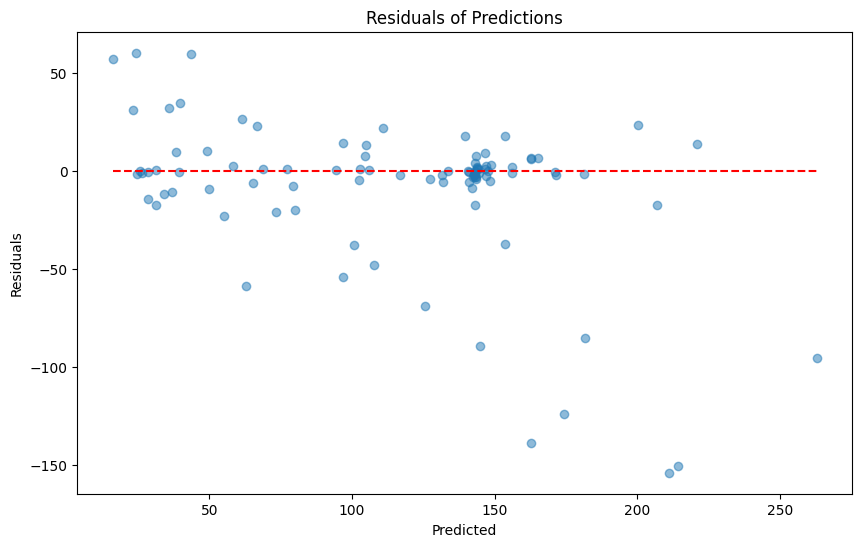

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Sourcing Cost')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()


# clustering to detect anomalies

/Users/Kermi/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Kermi/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Kermi/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Kermi/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

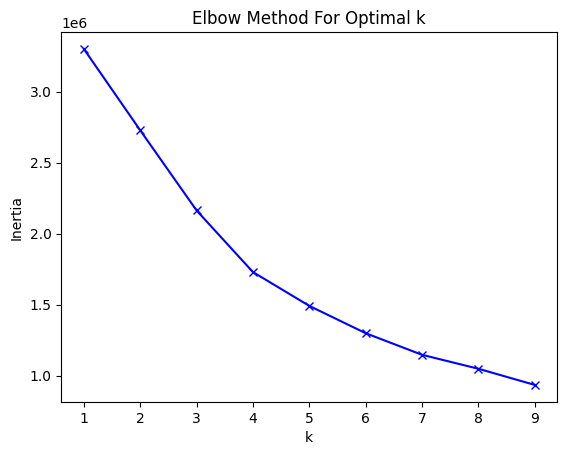

In [ ]:

from sklearn.cluster import KMeans

# Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_label_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


/Users/Kermi/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


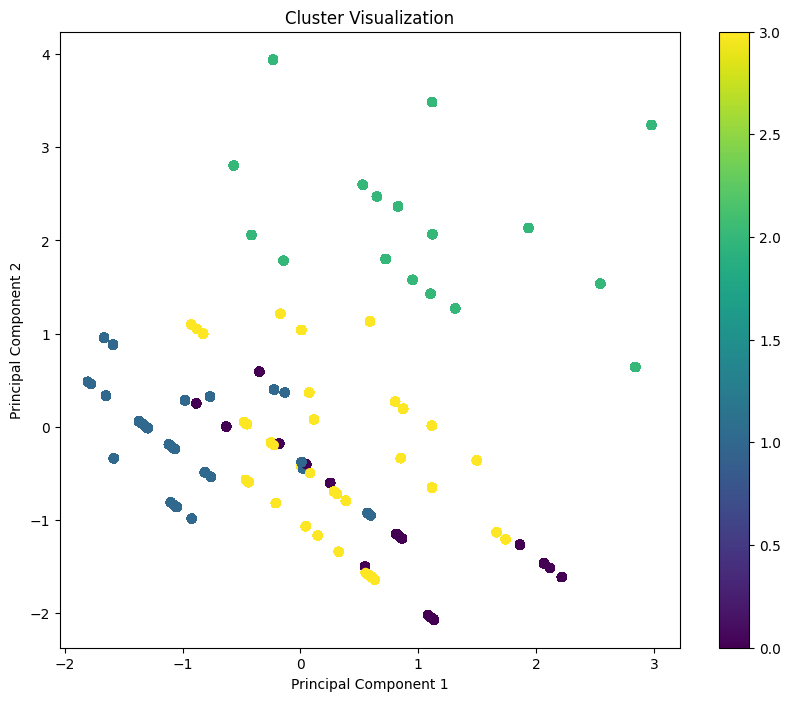

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_train_label_scaled)

# # Use PCA to reduce the dimensions for visualization
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train_label_scaled)

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()


## anomaly detection

In [ ]:
import numpy as np

# Detect anomalies: Find the distances to the closest cluster center
distances = kmeans.transform(X_train_label_scaled)
# Find the maximum distance in each cluster
max_distance = np.percentile(distances, 99)
# Consider points with a distance greater than 95th percentile as anomalies
outliers = distances.max(axis=1) > max_distance
anomalies = data[outliers]

print("Anomalies detected:")
print(anomalies)


Anomalies detected:
       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0             NTM3           X1       A28        WHOLESALE        Large   
3             NTM3           X1       A18        WHOLESALE        Small   
75            NTM3           X1       A18        WHOLESALE        Small   
99            NTM3           X1       A18        WHOLESALE        Small   
127           NTM3           X1       A18        WHOLESALE        Small   
...            ...          ...       ...              ...          ...   
550069        NTM3           X3       A22           RETAIL        Large   
550083        NTM3           X3       A22           RETAIL        Large   
550091        NTM3           X3       A22           RETAIL        Large   
550124        NTM3           X3       A22           RETAIL        Large   
550135        NTM3           X3       A22           RETAIL        Large   

       Product Type Month of Sourcing  Sourcing Cost  
0            Powder     

# preprocessing

## label encoding and scaling

In [ ]:
test_data= pd.read_csv('/Users/Kermi/Desktop/ap mollar/test_data.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Concatenate training and test data
combined_data = pd.concat([data, test_data])

# Convert 'Month of Sourcing' to datetime if not already converted
combined_data['Month of Sourcing'] = pd.to_datetime(combined_data['Month of Sourcing'], format='%b-%y')

# Apply label encoding to categorical columns
for col in categorical_columns:
    combined_data[col] = le.fit_transform(combined_data[col])

# Split the combined data back into training and test data
final_train = combined_data[combined_data['Month of Sourcing'] < '2021-06-01']
final_test = combined_data[combined_data['Month of Sourcing'] == '2021-06-01']

# Drop the 'Month of Sourcing' column as it's no longer needed for modeling
X_train_label = final_train.drop(['Sourcing Cost', 'Month of Sourcing'], axis=1)
y_train_label = final_train['Sourcing Cost']
X_test_label = final_test.drop(['Sourcing Cost', 'Month of Sourcing'], axis=1)
y_test_label = final_test['Sourcing Cost']


from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_label_scaled = scaler.fit_transform(X_train_label)
X_test_label_scaled = scaler.transform(X_test_label)


# model application

## Linear regression

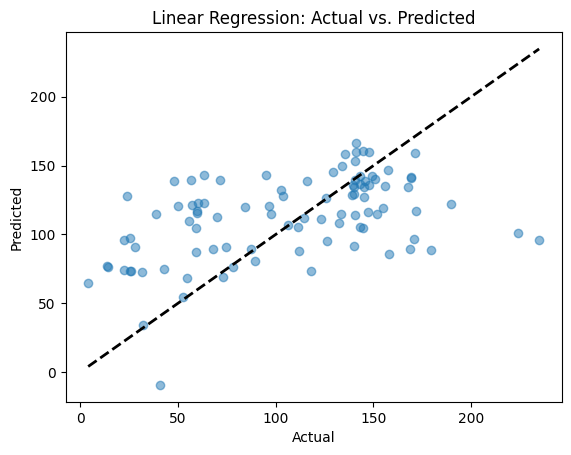

Linear Regression RMSE: 46.49751835714012


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

lin_reg = LinearRegression()
lin_reg.fit(X_train_label_scaled, y_train_label)
y_pred_lin = lin_reg.predict(X_test_label_scaled)
rmse_lin = mean_squared_error(y_test_label, y_pred_lin, squared=False)

plt.figure()
plt.scatter(y_test_label, y_pred_lin, alpha=0.5)
plt.plot([y_test_label.min(), y_test_label.max()], [y_test_label.min(), y_test_label.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

print(f'Linear Regression RMSE: {rmse_lin}')



## Gradient Boosting Regressor

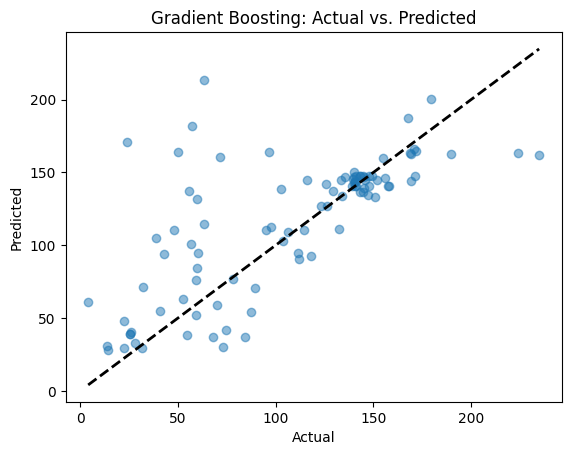

Gradient Boosting RMSE: 39.272023650752644


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_label_scaled, y_train_label)
y_pred_gbr = gbr.predict(X_test_label_scaled)
rmse_gbr = mean_squared_error(y_test_label, y_pred_gbr, squared=False)

plt.figure()
plt.scatter(y_test_label, y_pred_gbr, alpha=0.5)
plt.plot([y_test_label.min(), y_test_label.max()], [y_test_label.min(), y_test_label.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.show()

print(f'Gradient Boosting RMSE: {rmse_gbr}')



## XGBoost Regressor

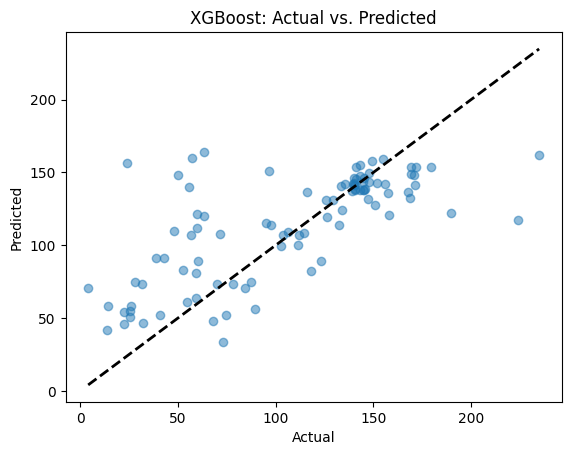

XGBoost RMSE: 37.6957424473296


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xgb_model.fit(X_train_label_scaled, y_train_label)
y_pred_xgb = xgb_model.predict(X_test_label_scaled)
rmse_xgb = mean_squared_error(y_test_label, y_pred_xgb, squared=False)

plt.figure()
plt.scatter(y_test_label, y_pred_xgb, alpha=0.5)
plt.plot([y_test_label.min(), y_test_label.max()], [y_test_label.min(), y_test_label.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs. Predicted')
plt.show()

print(f'XGBoost RMSE: {rmse_xgb}')


## Neural Network (MLP)

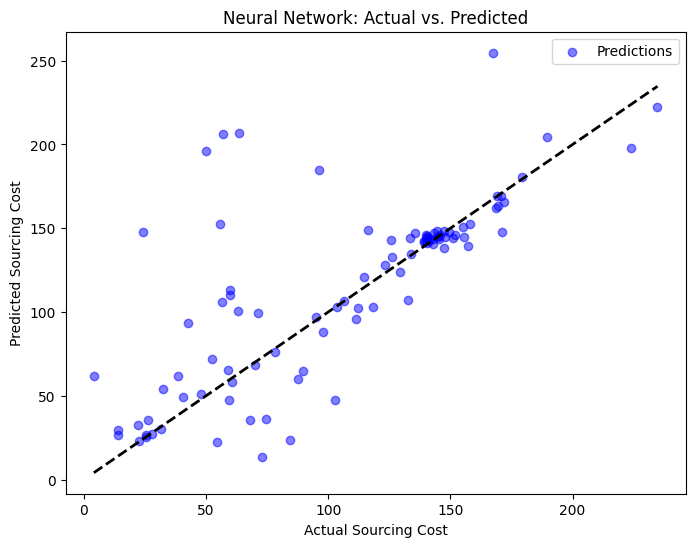

Neural Network RMSE: 38.59108993920479


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the MLPRegressor: Here it's already well-defined with hidden layers, activation function, and solver
nn = MLPRegressor(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', max_iter=500)

# Fit the model on scaled training data
nn.fit(X_train_label_scaled, y_train_label)

# Predict on the scaled test data
y_pred_nn = nn.predict(X_test_label_scaled)

# Calculate the Root Mean Squared Error
rmse_nn = mean_squared_error(y_test_label, y_pred_nn, squared=False)

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_label, y_pred_nn, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test_label.min(), y_test_label.max()], [y_test_label.min(), y_test_label.max()], 'k--', lw=2)
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Neural Network: Actual vs. Predicted')
plt.legend()
plt.show()

# Print the RMSE
print(f'Neural Network RMSE: {rmse_nn}')


## ANN

3/3 [==============================] - 0s 876us/step


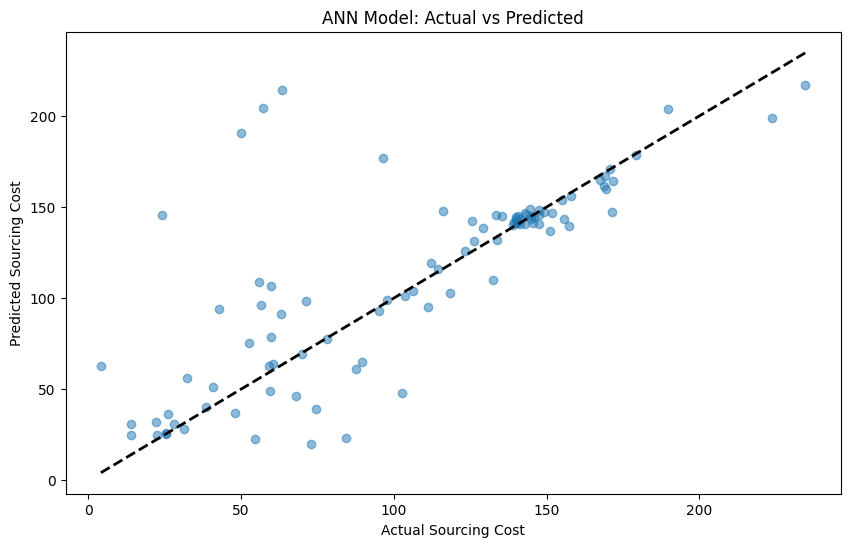

RMSE: 35.53


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the ANN architecture
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train_label_scaled.shape[1],)),
    Dense(30, activation='relu'),
    Dense(1)  # Output layer: no activation function, as it's a regression problem
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_label_scaled, y_train_label, epochs=100, validation_split=0.2, verbose=0)

# Predict on the test data
y_pred = model.predict(X_test_label_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_label, y_pred))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_label, y_pred, alpha=0.5)
plt.plot([y_test_label.min(), y_test_label.max()], [y_test_label.min(), y_test_label.max()], 'k--', lw=2)
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('ANN Model: Actual vs Predicted')
plt.show()

# Print RMSE
print(f'RMSE: {rmse:.2f}')


## elastic net

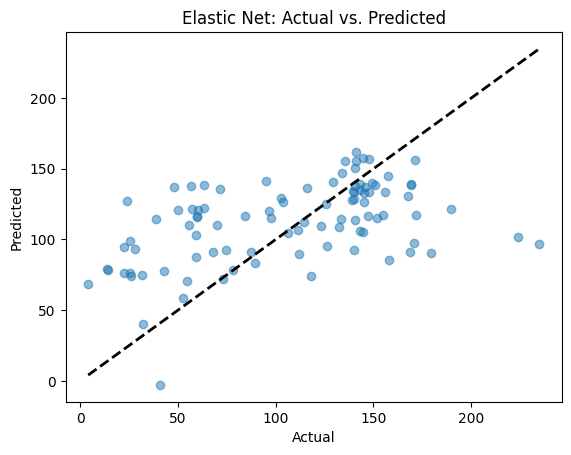

Elastic Net RMSE: 46.24303738939498


In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_label_scaled, y_train_label)

# Predict and evaluate
y_pred_en = elastic_net.predict(X_test_label_scaled)
rmse_en = mean_squared_error(y_test_label, y_pred_en, squared=False)

# Visualization
plt.figure()
plt.scatter(y_test_label, y_pred_en, alpha=0.5)
plt.plot([y_test_label.min(), y_test_label.max()], [y_test_label.min(), y_test_label.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Elastic Net: Actual vs. Predicted')
plt.show()

print(f'Elastic Net RMSE: {rmse_en}')


## knn regressor

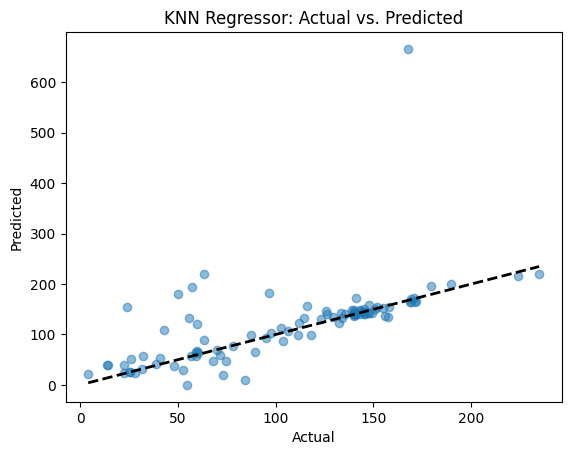

KNN Regressor RMSE: 62.3071935179505


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and fit the KNN model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_label_scaled, y_train_label)

# Predict and evaluate
y_pred_knn = knn_reg.predict(X_test_label_scaled)
rmse_knn = mean_squared_error(y_test_label, y_pred_knn, squared=False)

# Visualization
plt.figure()
plt.scatter(y_test_label, y_pred_knn, alpha=0.5)
plt.plot([y_test_label.min(), y_test_label.max()], [y_test_label.min(), y_test_label.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regressor: Actual vs. Predicted')
plt.show()

print(f'KNN Regressor RMSE: {rmse_knn}')


# Results

In [ ]:
# Assigning RMSE values to variables
rmse_lin = 46.49
rmse_en = 46.24
rmse_xgb = 37.69
rmse_gbr = 39.27
rmse_knn= 62.30
rmse_nn=34.01
rmse_rf= 38.51

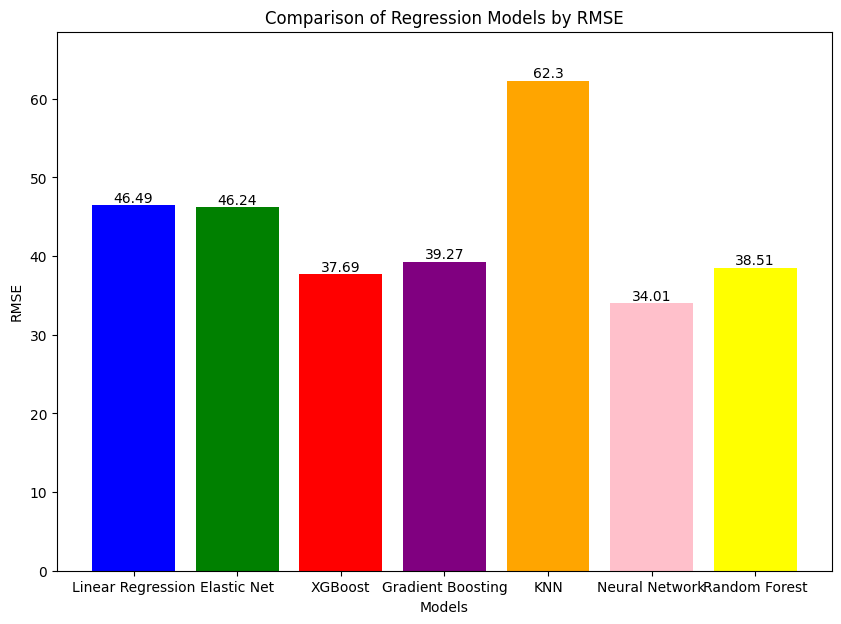

In [ ]:
import matplotlib.pyplot as plt

# Names of models
models = ['Linear Regression', 'Elastic Net', 'XGBoost', 'Gradient Boosting', 'KNN','Neural Network','Random Forest']

# Corresponding RMSE values
rmse_values = [rmse_lin, rmse_en,rmse_xgb,rmse_gbr, rmse_knn,rmse_nn,rmse_rf]

# Creating the bar chart
plt.figure(figsize=(10, 7))
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple', 'orange','pink','yellow'])

# Adding title and labels
plt.title('Comparison of Regression Models by RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) * 1.1)  # Extend y-axis limit for better visual

# Adding value labels on top of each bar
for i in range(len(rmse_values)):
    plt.text(i, rmse_values[i], round(rmse_values[i], 2), ha = 'center', va = 'bottom')

# Show the plot
plt.show()
